In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
print(os.listdir(r"C:\Users\afrah\Downloads\rnn stock price"))


['testset.csv', 'trainset.csv']


<h1> Loading Data

In [4]:
dataset_train = pd.read_csv(r"C:\Users\afrah\Downloads\rnn stock price\trainset.csv")

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [6]:
train = dataset_train.loc[:, ['Open']].values #array'e çevirdik
train

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

<h1> Feature Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.01011148],
       [0.01388614],
       [0.01690727],
       ...,
       [0.97543954],
       [0.9674549 ],
       [0.96072522]])

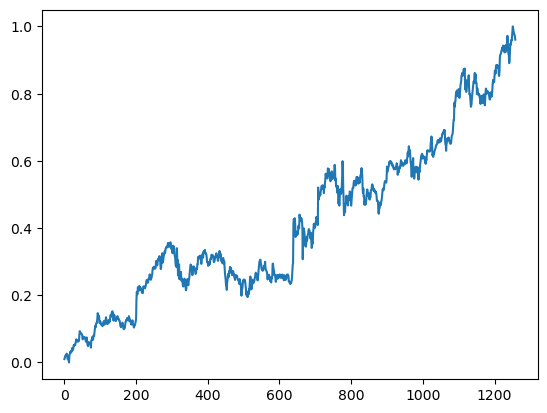

In [8]:
plt.plot(train_scaled)

<h1> Data Structure

In [9]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1250):
    X_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

<h1> Reshape

In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

<h1> RNN MOdel

In [11]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
38/38 [==============================] - 41s 132ms/step - loss: 0.4422
Epoch 2/100
38/38 [==============================] - 5s 126ms/step - loss: 0.3303
Epoch 3/100
38/38 [==============================] - 4s 119ms/step - loss: 0.2338
Epoch 4/100
38/38 [==============================] - 5s 123ms/step - loss: 0.1994
Epoch 5/100
38/38 [==============================] - 5s 125ms/step - loss: 0.1542
Epoch 6/100
38/38 [==============================] - 5s 120ms/step - loss: 0.1179
Epoch 7/100
38/38 [==============================] - 4s 116ms/step - loss: 0.1038
Epoch 8/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0749
Epoch 9/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0596
Epoch 10/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0580
Epoch 11/100
38/38 [==============================] - 5s 133ms/step - loss: 0.0530
Epoch 12/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0381
Epoch 13/100

<h1>Prediction and Visualization of RNN Model

In [12]:
dataset_test = pd.read_csv(r"C:\Users\afrah\Downloads\rnn stock price\testset.csv")
dataset_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [13]:
real_stock_price = dataset_test.loc[:, ['Open']].values
real_stock_price

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [14]:
#Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #minmax scaler
inputs

array([[0.87699047],
       [0.88173435],
       [0.88184469],
       [0.85492597],
       [0.85267815],
       [0.86871629],
       [0.90897021],
       [0.91560335],
       [0.91728573],
       [0.92003007],
       [0.92630465],
       [0.92678727],
       [0.93627502],
       [0.93390312],
       [0.93838498],
       [0.94317017],
       [0.93278603],
       [0.9285938 ],
       [0.92744927],
       [0.92278813],
       [0.92735273],
       [0.94319778],
       [0.9242361 ],
       [0.92844213],
       [0.94456301],
       [0.94576276],
       [0.95145817],
       [0.9722677 ],
       [0.95515404],
       [0.92714584],
       [0.91808559],
       [0.91375541],
       [0.89069805],
       [0.89836546],
       [0.92447051],
       [0.94799678],
       [0.94525252],
       [0.95094793],
       [0.95989783],
       [0.95835332],
       [0.97160579],
       [0.98742324],
       [1.        ],
       [0.99528382],
       [0.98586493],
       [0.9805695 ],
       [0.97637719],
       [0.975

In [15]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 4s 4s/step


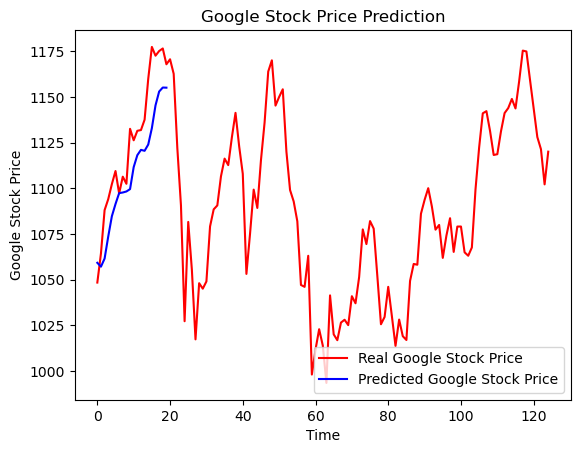

In [16]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

<h1>Implementing LSTM with KERAS
   Loading Data 

In [17]:
data = pd.read_csv(r"C:\Users\afrah\Downloads\rnn stock price\international-airline-passengers.csv")
data.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


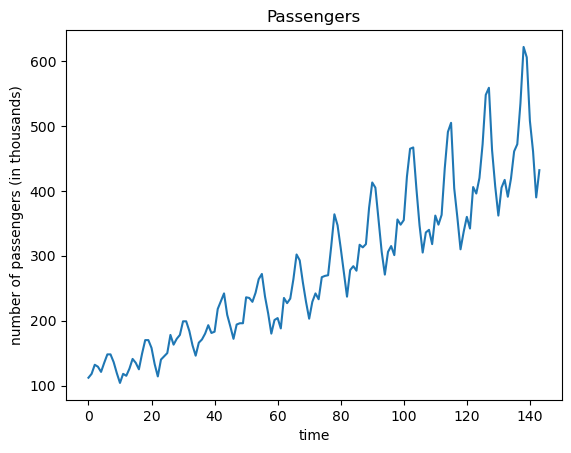

In [18]:
dataset = data.iloc[:, 1].values
plt.plot(dataset)
plt.xlabel('time')
plt.ylabel('number of passengers (in thousands)')
plt.title('Passengers')
plt.show()

<h1> Reshape

In [19]:
dataset = dataset.reshape(-1,1) 
dataset = dataset.astype('float32')
dataset.shape

(145, 1)

<h1> Scaling:

In [20]:
scaler = MinMaxScaler(feature_range= (0,1))
dataset = scaler.fit_transform(dataset)

<h1>Train Test Split:

In [21]:
train_size = int(len(dataset)*0.5)
test_size = len(dataset)- train_size

train = dataset[0:train_size, :]
test = dataset[train_size:len(dataset), :]

print('train size: {}, test size: {}'.format(len(train), len(test)))

train size: 72, test size: 73


In [22]:
dataX = []
datay = []
timestemp = 10

for i in range(len(train)- timestemp -1):
    a = train[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(train[i + timestemp, 0])

    
trainX, trainy = np.array(dataX), np.array(datay)

In [23]:
dataX = []
datay = []
for i in range(len(test)- timestemp -1):
    a = test[i:(i+timestemp), 0]
    dataX.append(a)
    datay.append(test[i + timestemp, 0])

    
testX, testy = np.array(dataX), np.array(datay)

In [24]:
trainX.shape

(61, 10)

In [25]:
trainX = np.reshape(trainX, (trainX.shape[0],1,  trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1,  testX.shape[1]))

In [26]:
trainX.shape

(61, 1, 10)

<h1> Create LSTM Model

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [28]:
# model
model = Sequential()
model.add(LSTM(10, input_shape=(1, timestemp))) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainy, epochs=50, batch_size=1)

Epoch 1/50
61/61 [==============================] - 17s 11ms/step - loss: 0.0196
Epoch 2/50
61/61 [==============================] - 1s 10ms/step - loss: 0.0045
Epoch 3/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0039
Epoch 4/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0035
Epoch 5/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0033
Epoch 6/50
61/61 [==============================] - 1s 10ms/step - loss: 0.0030
Epoch 7/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0028
Epoch 8/50
61/61 [==============================] - 1s 10ms/step - loss: 0.0026
Epoch 9/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0024
Epoch 10/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0023
Epoch 11/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0022
Epoch 12/50
61/61 [==============================] - 1s 11ms/step - loss: 0.0020
Epoch 13/50
61/61 [=================

<h1> Prediction

In [29]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainy = scaler.inverse_transform([trainy])
testPredict = scaler.inverse_transform(testPredict)
testy = scaler.inverse_transform([testy])

import math
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainy[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testy[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 32ms/step
Train Score: 17.86 RMSE
Test Score: 50.40 RMSE


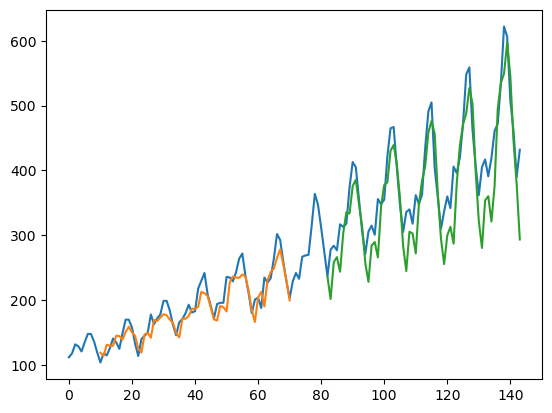

In [30]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestemp:len(trainPredict)+timestemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()